In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [2]:
#Import data about directory information
dfhd= pd.read_csv("https://nces.ed.gov/ipeds/datacenter/data/HD2020.zip", compression = "zip", encoding = "latin1")
#Import data about institutional characteristic
dfic = pd.read_csv("https://nces.ed.gov/ipeds/datacenter/data/IC2020.zip", compression = "zip", encoding = "latin1")
dfay = pd.read_csv("https://nces.ed.gov/ipeds/datacenter/data/IC2020_AY.zip", compression = "zip", encoding = "latin1")
#Import data about admissions and test scores
dfad = pd.read_csv("https://nces.ed.gov/ipeds/datacenter/data/ADM2020.zip", compression = "zip", encoding = "latin1")
#Import data about award and completion
dfc_a = pd.read_csv("https://nces.ed.gov/ipeds/datacenter/data/C2020_A.zip", compression = "zip", encoding = "latin1")

In [3]:
#new hd2020
dfhd = dfhd[['UNITID', 'INSTNM', 
             'WEBADDR', 'GENTELE', 
             'ADMINURL', 'APPLURL', 
             'NPRICURL', 'SECTOR', 'ICLEVEL', 'CONTROL', 
             'HLOFFER', 'UGOFFER', 'GROFFER', 
             'DEGGRANT', 'OPENPUBL', 
             'C18BASIC', 'C18ENPRF', 'C18IPUG', 'C18UGPRF', 'C18IPGRD', 
             'C18SZSET', 'INSTSIZE', 
             'CITY', 'STABBR', 'ZIP', 
             'LOCALE', 'LONGITUD','LATITUDE']]
#new ic2020
dfic = dfic[['UNITID','CALSYS',
            'FT_UG','FT_FTUG','FTGDNIDP',
            'PT_UG','PT_FTUG','PTGDNIDP',
            'TUITPL','ROOM','ROOMCAP','BOARD',
            'MEALSWK','ROOMAMT','BOARDAMT']]
#new ic2020_ay
dfay = dfay[['UNITID','TUITION2','TUITION3','TUITION6','TUITION7',
            'CHG2AT0','CHG2AT1','CHG2AT2','CHG2AT3',
            'CHG2AF0','CHG2AF1','CHG2AF2','CHG2AF3',
            'CHG3AT0','CHG3AT1','CHG3AT2','CHG3AT3',
            'CHG3AF0','CHG3AF1','CHG3AF2','CHG3AF3',
            'CHG5AY0','CHG5AY1','CHG5AY2','CHG5AY3',
            'CHG6AY0','CHG6AY1','CHG6AY2','CHG6AY3',
            'CHG7AY0','CHG7AY1','CHG7AY2','CHG7AY3',
            'CHG8AY0','CHG8AY1','CHG8AY2','CHG8AY3',
            'CHG9AY0','CHG9AY1','CHG9AY2','CHG9AY3 ']]

#Merge 5 datasets
dfhdic = pd.merge(dfhd,dfic, how = "inner", on = "UNITID")
dfayad = pd.merge(dfay,dfad, how = "inner", on = "UNITID")
dfgen = pd.merge(dfhdic,dfayad,how = "inner", on = "UNITID")
dfAll = pd.merge(dfgen,dfc_a,how = "inner", on = "UNITID")





#Change the values of sector
dfAll['SECTOR'] = dfAll['SECTOR'].replace(1,'Public, 4-year or above')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(2,'Private not-for-profit, 4-year or above')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(3,'Private for-profit, 4-year or above')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(4,'Public, 2-year')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(5,'Private not-for-profit, 2-year')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(6,'Private for-profit, 2-year')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(7,'Public, less-than 2-year')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(8,'Private not-for-profit, less-than 2-year')
dfAll['SECTOR'] = dfAll['SECTOR'].replace(9,'Private for-profit, less-than 2-year')


#Change the values of UGOFFER
dfAll['UGOFFER'] = dfAll['UGOFFER'].replace(1,'Undergraduate degree or certificate offering')
dfAll['UGOFFER'] = dfAll['UGOFFER'].replace(2,'No undergraduate offering')
dfAll['UGOFFER'] = dfAll['UGOFFER'].replace(-3,'Not available')

#Change the values of GROFFER
dfAll['GROFFER'] = dfAll['GROFFER'].replace(1,'Graduate degree or certificate offering')
dfAll['GROFFER'] = dfAll['GROFFER'].replace(2,'No graduate offering')
dfAll['GROFFER'] = dfAll['GROFFER'].replace(-3,'Not available')

#Change the values of DEGGRANT
dfAll['DEGGRANT'] = dfAll['DEGGRANT'].replace(1,'Degree Granting')
dfAll['DEGGRANT'] = dfAll['DEGGRANT'].replace(2,'Nondegree-granting, primarily postsecondary')
dfAll['DEGGRANT'] = dfAll['DEGGRANT'].replace(-3,'Not available')

#Change the values of HLOFFER
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(1,"Award of less than one academic year")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(2,"At least 1, but less than 2 academic years")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(3,"Associate's degree")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(4,"At least 2, but less than 4 academic years")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(5,"Bachelor's degree")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(6,"Postbaccalaureate certificate")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(7,"Master's degree")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(8,"Post-master's certificate")
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(9,'Doctor\'s degree')
dfAll['HLOFFER'] = dfAll['HLOFFER'].replace(-3,'Not available')

#Change the values of C18SZSET
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(1,"Two-year, very small")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(2,"Two-year, small")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(3,"Two-year, medium")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(4,"Two-year, large")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(5,"Two-year, very large")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(6,"Four-year, very small, primarily nonresidential")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(7,"Four-year, very small, primarily residential")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(8,"Four-year, very small, highly residential")
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(9,'Four-year, small, primarily nonresidential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(10,'Four-year, small, primarily residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(11,'Four-year, small, highly residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(12,'Four-year, medium, primarily nonresidential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(13,'Four-year, medium, primarily residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(14,'Four-year, medium, highly residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(15,'Four-year, large, primarily nonresidential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(16,'Four-year, large, primarily residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(17,'Four-year, large, highly residential')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(18,'Exclusively graduate/professional')
dfAll['C18SZSET'] = dfAll['C18SZSET'].replace(-2,'Not applicable, not in Carnegie universe (not accredited or nondegree-granting)')




In [28]:
#Acceptane rate
dfAll['ADMTOTAL'] = round((dfAll['ADMSSN']/dfAll['APPLCN'])*100,1)
dfAll['ADMMEN'] = round((dfAll['ADMSSNM']/dfAll['APPLCNM'])*100,1)
dfAll['ADMWOMEN'] = round((dfAll['ADMSSNW']/dfAll['APPLCNW'])*100,1)
dfAll.to_csv('collegeData.csv')

In [50]:
#Undergrad In-state Tuition vs. Time (Types of Institution)
dfInstate = dfAll[['UNITID','SECTOR','CHG2AT0','CHG2AT1','CHG2AT2','CHG2AT3']].drop_duplicates()

#Change the type of the date column to Int64
dfInstate['CHG2AT0'] = dfInstate['CHG2AT0'].replace('.', -1).astype('int64')
dfInstate['CHG2AT1'] = dfInstate['CHG2AT1'].replace('.', -1).astype('int64')
dfInstate['CHG2AT2'] = dfInstate['CHG2AT2'].replace('.', -1).astype('int64')
dfInstate['CHG2AT3'] = dfInstate['CHG2AT3'].replace('.', -1).astype('int64')

dfInstate = dfInstate[(dfInstate['CHG2AT0'] >= 0) & (dfInstate['CHG2AT1'] >= 0) & (dfInstate['CHG2AT2'] >= 0) & (dfInstate['CHG2AT3'] >= 0)]

#Rename the column
dfInstate = dfInstate.rename(columns = {'CHG2AT0':'2017-18',
                                        'CHG2AT1':'2018-19',
                                        'CHG2AT2':'2019-20',
                                        'CHG2AT3':'2020-21'})
#Reshape the data
dfTimeTuit1 = dfInstate.dropna().melt(id_vars = ['UNITID','SECTOR'], value_vars = ['2017-18','2018-19','2019-20','2020-21'],
                             var_name = 'Year', value_name = 'Tuition')


#Change the type of the date column to Int64
#dfTimeTuit1['Tuition'] = dfTimeTuit1['Tuition'].astype('float64').astype('Int64')
dfTimeTuit1 = dfTimeTuit1[['SECTOR','Year','Tuition']].groupby(['SECTOR','Year'],as_index = False).mean()

#Change the values of sector
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(1,'Public, 4-year or above')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(2,'Private not-for-profit, 4-year or above')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(3,'Private for-profit, 4-year or above')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(4,'Public, 2-year')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(5,'Private not-for-profit, 2-year')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(6,'Private for-profit, 2-year')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(7,'Public, less-than 2-year')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(8,'Private not-for-profit, less-than 2-year')
dfTimeTuit1['SECTOR'] = dfTimeTuit1['SECTOR'].replace(9,'Private for-profit, less-than 2-year')
dfTimeTuit1.to_csv('dfTimeTuit1.csv')
#dfTimeTuit1['SECTOR'].unique()

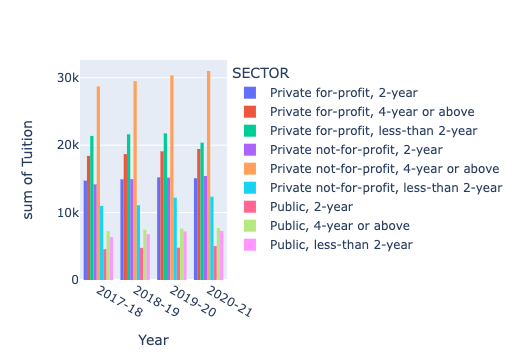

In [46]:
#(Plotly)Plot the data
fig = px.histogram(dfTimeTuit1, 
        x = 'Year', 
        y = 'Tuition',
        color = 'SECTOR',
        barmode = 'group')
fig.show()
#fig.write_html('dfTimeTuit1.html')

In [51]:
#Undergrad Out-state Tuition vs. Time (Types of Institution)
dfOutstate = dfAll[['UNITID','SECTOR','CHG3AT0','CHG3AT1','CHG3AT2','CHG3AT3']].drop_duplicates()

#Change the type of the date column to Int64
dfOutstate['CHG3AT0'] = dfOutstate['CHG3AT0'].replace('.', -1).astype('int64')
dfOutstate['CHG3AT1'] = dfOutstate['CHG3AT1'].replace('.', -1).astype('int64')
dfOutstate['CHG3AT2'] = dfOutstate['CHG3AT2'].replace('.', -1).astype('int64')
dfOutstate['CHG3AT3'] = dfOutstate['CHG3AT3'].replace('.', -1).astype('int64')

dfOutstate = dfOutstate[(dfOutstate['CHG3AT0'] >= 0) & (dfOutstate['CHG3AT1'] >= 0) & (dfOutstate['CHG3AT2'] >= 0) & (dfOutstate['CHG3AT3'] >= 0)]

#Rename the column
dfOutstate = dfOutstate.rename(columns = {'CHG3AT0':'2017-18',
                                        'CHG3AT1':'2018-19',
                                        'CHG3AT2':'2019-20',
                                        'CHG3AT3':'2020-21'})
#Reshape the data
dfTimeTuit2 = dfOutstate.dropna().melt(id_vars = ['UNITID','SECTOR'], value_vars = ['2017-18','2018-19','2019-20','2020-21'],
                             var_name = 'Year', value_name = 'Tuition')



#Change the type of the date column to Int64
dfTimeTuit2 = dfTimeTuit2[['SECTOR','Year','Tuition']].groupby(['SECTOR','Year'],as_index = False).mean()

#Change the values of sector
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(1,'Public, 4-year or above')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(2,'Private not-for-profit, 4-year or above')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(3,'Private for-profit, 4-year or above')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(4,'Public, 2-year')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(5,'Private not-for-profit, 2-year')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(6,'Private for-profit, 2-year')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(7,'Public, less-than 2-year')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(8,'Private not-for-profit, less-than 2-year')
dfTimeTuit2['SECTOR'] = dfTimeTuit2['SECTOR'].replace(9,'Private for-profit, less-than 2-year')
dfTimeTuit2.to_csv('dfTimeTuit2.csv')

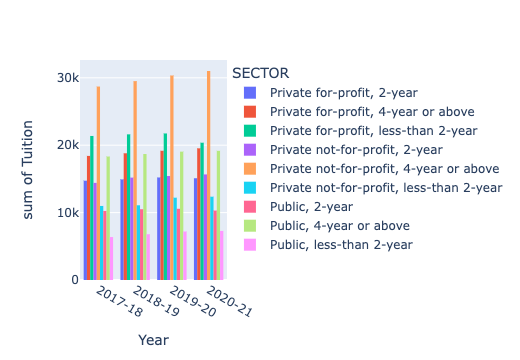

In [8]:
#(Plotly)Plot the data
fig = px.histogram(dfTimeTuit2, 
        x = 'Year', 
        y = 'Tuition',
        color = 'SECTOR',
        barmode = 'group')
fig.show()
fig.write_image('dfTimeTuit2.png')

In [43]:
#Major vs. Race
dfMajor = dfAll[['UNITID', 'CIPCODE',
                 'CTOTALT','CTOTALM','CTOTALW', 
                 'CAIANT', 'CAIANM', 'CAIANW',  
                 'CASIAT', 'CASIAM', 'CASIAW', 
                 'CBKAAT', 'CBKAAM', 'CBKAAW', 
                 'CHISPT', 'CHISPM', 'CHISPW',  
                 'CNHPIT', 'CNHPIM', 'CNHPIW',  
                 'CWHITT', 'CWHITM', 'CWHITW', 
                 'C2MORT', 'C2MORM', 'C2MORW', 
                 'CUNKNT', 'CUNKNM', 'CUNKNW', 
                 'CNRALT', 'CNRALM', 'CNRALW  ']].drop_duplicates()


dfMajor = dfMajor.rename(columns = {'CTOTALT':'Grand total',
                        'CTOTALM':'Grand total men',
                        'CTOTALW':'Grand total women',
                         #American Indian or Alaska Native
                        'CAIANT':'American Indian or Alaska Native total',
                        'CAIANW':'American Indian or Alaska Native men',
                        'CAIANM':'American Indian or Alaska Native women',
                         #Asian
                        'CASIAT':'Asian total',
                        'CASIAM':'Asian men',
                        'CASIAW':'Asian women',
                         #Black or African American
                        'CBKAAT':'Black or African American total',
                        'CBKAAM':'Black or African American men',
                        'CBKAAW':'Black or African American women',
                         #Hispanic or Latino
                        'CHISPT':'Hispanic or Latino total',
                        'CHISPM':'Hispanic or Latino men',
                        'CHISPW':'Hispanic or Latino women',
                         #Native Hawaiian or Other Pacific Islander
                        'CNHPIT':'Native Hawaiian or Other Pacific Islander total',
                        'CNHPIM':'Native Hawaiian or Other Pacific Islander men',
                        'CNHPIW':'Native Hawaiian or Other Pacific Islander women',
                         #White
                        'CWHITT':'White total',
                        'CWHITM':'White men',
                        'CWHITW':'White women',
                        #Two or more races 
                        'C2MORT':'Two or more races total',
                        'C2MORM':'Two or more races men',
                        'C2MORW':'Two or more races women',
                        #Race/ethnicity unknown 
                        'CUNKNT':'Race/ethnicity unknown total',
                        'CUNKNM':'Race/ethnicity unknown men',
                        'CUNKNW':'Race/ethnicity unknown women',
                        #Nonresident alien 
                        'CNRALT':'Nonresident alien total',
                        'CNRALM':'Nonresident alien men',
                        'CNRALW  ':'Nonresident alien women'}).drop_duplicates()

dfRaceMajor = dfMajor.melt(id_vars = ['UNITID','CIPCODE'], 
                           value_vars = ['Grand total men',
                                           'Grand total women', 'American Indian or Alaska Native total',
                                           'American Indian or Alaska Native women',
                                           'American Indian or Alaska Native men', 'Asian total', 'Asian men',
                                           'Asian women', 'Black or African American total',
                                           'Black or African American men', 'Black or African American women',
                                           'Hispanic or Latino total', 'Hispanic or Latino men',
                                           'Hispanic or Latino women',
                                           'Native Hawaiian or Other Pacific Islander total',
                                           'Native Hawaiian or Other Pacific Islander men',
                                           'Native Hawaiian or Other Pacific Islander women', 'White total',
                                           'White men', 'White women', 'Two or more races total',
                                           'Two or more races men', 'Two or more races women',
                                           'Race/ethnicity unknown total', 'Race/ethnicity unknown men',
                                           'Race/ethnicity unknown women', 'Nonresident alien total',
                                           'Nonresident alien men','Nonresident alien women'],
                           var_name = 'Race', 
                           value_name = 'Major numbers')
dfRaceMajor

,UNITID,CIPCODE,Race,Major numbers
0,100654,1.0999,Grand total men,0
1,100654,1.1001,Grand total men,2
2,100654,1.1001,Grand total men,0
3,100654,1.1001,Grand total men,2
4,100654,1.9999,Grand total men,4
...,...,...,...,...
4922948,495767,99.0000,Nonresident alien women,1
4922949,495767,99.0000,Nonresident alien women,33
4922950,495916,24.0101,Nonresident alien women,0
4922951,495916,52.0201,Nonresident alien women,0


In [16]:
#map
dfmap = dfAll[['UNITID','LATITUDE','LONGITUD']]
dfmap

,UNITID,LATITUDE,LONGITUD
0,100654,34.783368,-86.568502
1,100654,34.783368,-86.568502
2,100654,34.783368,-86.568502
3,100654,34.783368,-86.568502
4,100654,34.783368,-86.568502
...,...,...,...
174788,495767,40.796500,-77.862848
174789,495767,40.796500,-77.862848
174790,495916,34.152285,-118.078697
174791,495916,34.152285,-118.078697
